# Anonymizing Data Project


In [80]:
import pandas as pd
import numpy as np
import scipy.stats
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [57]:

#import file into DF
Employee_data_DF = pd.read_csv('https://raw.githubusercontent.com/skhayden/MSDS-7349-Sec403-/master/Class_Project/Employee_data.csv',low_memory=False)
#Remove unneeded columns
Employee_data_DF.drop(['Job.1','Unnamed: 0'], axis = 1, inplace = True) 
Employee_data_DF.head()

,First Name,Last Name,Date of Birth,Job,Address,Salary,SSN,Employee_Id,Office_Location,Building_number,Phone_Number,Email
0,Matthew,Johnson,4/11/1993,Research scientist (physical sciences),USS Walker\nFPO AA 91930,64822,691-17-3378,P37429,West Andrew,961,3298685475,Matthewgmail.com
1,Elizabeth,Frazier,6/17/1989,"Therapist, speech and language","8283 Kimberly Streets Apt. 001\nEast Edward, D...",37351,675-40-3501,P90953,South Tammymouth,590,524-601-7567x7090,EFrazier93erez.com
2,Lori,Vargas,8/24/1959,"Designer, furniture","235 Devin Ridges\nCraneshire, OR 16065",74379,821-81-4954,P38017,West Arthur,198,316-095-9037x69942,Loriegregory@smith.com
3,Sarah,Espinoza,12/1/1983,Water engineer,"78762 Eileen Camp\nNelsonhaven, ID 36069",81275,124-10-4970,P91959,Greerborough,10033,+1-209-595-5257x826,SEspinozad-perry.com
4,Melissa,Hunter,9/24/1949,Agricultural engineer,"3346 Anderson Lakes\nShawville, IL 85803",35409,789-99-6633,P36920,Davisburgh,633,44421409,Melissazkimberly@wiley.com


C:\Users\otany\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


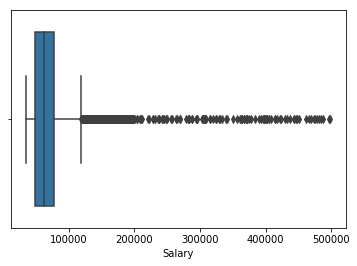

In [58]:
a1 = sns.boxplot(x=Employee_data_DF['Salary'])

10% off the records in Employee data set had Salaries > 130K, those were outliers. They were excluded from analysis. Employee data set did not have NA values.

In [59]:
#remove false records and replot
Employee_data = Employee_data_DF[Employee_data_DF.Salary < 130000]

C:\Users\otany\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


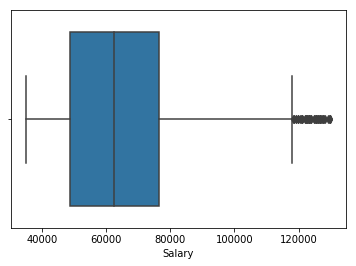

In [60]:
a1 = sns.boxplot(x=Employee_data['Salary'])

In [61]:
Employee_data = Employee_data.reset_index(drop=True)

In [62]:
Employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20134 entries, 0 to 20133
Data columns (total 12 columns):
First Name         20134 non-null object
Last Name          20134 non-null object
Date of Birth      20134 non-null object
Job                20134 non-null object
Address            20134 non-null object
Salary             20134 non-null int64
SSN                20134 non-null object
Employee_Id        20134 non-null object
Office_Location    20134 non-null object
Building_number    20134 non-null int64
Phone_Number       20134 non-null object
Email              20134 non-null object
dtypes: int64(2), object(10)
memory usage: 1.8+ MB


##### Pseudonymization and Suppression

We generated 5 digit code "Person_ID" for each employee (Pseudonymization) and creted two data sets: Secret data set with sensetive data, which is securely kept, and Anonymized data set, that will be used for further anonimization. From Anonymized data set sensetive attributes such as "First Name", "Last Name", "Address", "SSN", "Employee_Id", "Phone_Number", "Email" were deleted (Suppression). But we included Person_ID in it for future reversing.

In [63]:
from random import randint

def random_with_N_digits(n):
    range_start = 10**(n-1)
    range_end = (10**n)-1
    return randint(range_start, range_end)


In [64]:
d = np.random.randint(10000,50000,20134)
Person_id = pd.DataFrame(d, columns = ["Person_id"])
Person_id.tail()

,Person_id
20129,48856
20130,40720
20131,12415
20132,36945
20133,26737


In [66]:
#len(Employee_data["Person_id"].unique().tolist())
Secret_data = pd.concat([Person_id, Employee_data], axis=1, sort=False)
Secret_data_final = Secret_data[["Person_id", "First Name", "Last Name", "Address", "SSN", "Employee_Id", "Building_number",
                        "Phone_Number", "Email"]]
Secret_data_final

,Person_id,First Name,Last Name,Address,SSN,Employee_Id,Building_number,Phone_Number,Email
0,19264,Matthew,Johnson,USS Walker\nFPO AA 91930,691-17-3378,P37429,961,3298685475,Matthewgmail.com
1,35123,Elizabeth,Frazier,"8283 Kimberly Streets Apt. 001\nEast Edward, D...",675-40-3501,P90953,590,524-601-7567x7090,EFrazier93erez.com
2,23744,Lori,Vargas,"235 Devin Ridges\nCraneshire, OR 16065",821-81-4954,P38017,198,316-095-9037x69942,Loriegregory@smith.com
3,14165,Sarah,Espinoza,"78762 Eileen Camp\nNelsonhaven, ID 36069",124-10-4970,P91959,10033,+1-209-595-5257x826,SEspinozad-perry.com
4,30098,Melissa,Hunter,"3346 Anderson Lakes\nShawville, IL 85803",789-99-6633,P36920,633,44421409,Melissazkimberly@wiley.com
5,41136,Ronnie,Hubbard,"7428 Ashley Knoll\nAllenland, TX 61156",603-64-4161,P41375,3237,159-856-8017x326,RHubbardn@gmail.com
6,12591,Teresa,Hale,"0239 Samuel Plaza Suite 784\nEast Deborah, IL ...",597-83-8253,P52802,395,389.029.6440x722,Teresa@goodwin.net
7,44818,Christina,Valencia,"8172 Paul Park\nGrahamside, MS 97518",599-06-0062,P32719,421,932.019.1533x330,CValenciaross-west.info
8,14623,Robert,Velasquez,"34310 Arnold Union Apt. 879\nWest Omar, OR 99014",218-74-9051,P82911,5407,000-891-9268,Robert01hoo.com
9,10087,William,Kelly,"809 Kristin Divide Suite 785\nSchroederville, ...",380-23-8416,P96892,20341,(375)634-1688x889,WKellymail.com


In [67]:
Anonymized_data = Secret_data[["Person_id", "Date of Birth", "Job", "Salary", "Office_Location"]]
Anonymized_data.tail()

,Person_id,Date of Birth,Job,Salary,Office_Location
20129,48856,2/3/1962,"Programmer, applications Sr.Manager",119699,Nicholasberg
20130,40720,3/3/1980,Historic buildings inspector/conservation offi...,111541,West Charlesburgh
20131,12415,1/3/1990,"Accountant, chartered management Sr.Manager",125266,Stevenside
20132,36945,11/21/1990,Chief Financial Officer Sr.Manager,122120,Gregoryland
20133,26737,12/14/1961,Arts development officer Sr.Manager,109241,East Elizabeth


##### Bucketization and Generalization

We turned feature the "Date of Birth" into an "Age" (Bucketization), then modified it into an "Age range" (Generalization). Also we modified the "Salary" into a "Salary range" (Generalization).

In [68]:
#Bucketization of Date of Birth by turning it into age

Anonymized_data["Date of Birth"] = pd.to_datetime(Anonymized_data["Date of Birth"])

Anonymized_data['Age'] = ((datetime.datetime.now() - Anonymized_data['Date of Birth'])/365.25).dt.days
#drop DOB column
Anonymized_data.drop(['Date of Birth'] , axis = 1, inplace = True) 

#Rearrange columns 
Anonymized_data=Anonymized_data[["Person_id", "Age", "Job", "Office_Location", "Salary",]]

Anonymized_data.head()

C:\Users\otany\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\otany\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\otany\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,Person_id,Age,Job,Office_Location,Salary
0,19264,25,Research scientist (physical sciences),West Andrew,64822
1,35123,29,"Therapist, speech and language",South Tammymouth,37351
2,23744,59,"Designer, furniture",West Arthur,74379
3,14165,35,Water engineer,Greerborough,81275
4,30098,69,Agricultural engineer,Davisburgh,35409


In [69]:
print("Min Age:", Anonymized_data.Age.min())
print("Max Age:", Anonymized_data.Age.max())

Min Age: 19
Max Age: 76


In [70]:
age_ranges = ["{0} - {1}".format(age, age + 9) for age in range(19, 76, 10)]

In [71]:
count_unique_age_ranges = len(age_ranges)
Anonymized_data['Age_range'] = pd.cut(x=Anonymized_data['Age'], bins=count_unique_age_ranges, labels=age_ranges)
Anonymized_data=Anonymized_data[["Person_id", "Age_range", "Job", "Office_Location", "Salary",]]
Anonymized_data.head()

,Person_id,Age_range,Job,Office_Location,Salary
0,19264,19 - 28,Research scientist (physical sciences),West Andrew,64822
1,35123,29 - 38,"Therapist, speech and language",South Tammymouth,37351
2,23744,59 - 68,"Designer, furniture",West Arthur,74379
3,14165,29 - 38,Water engineer,Greerborough,81275
4,30098,69 - 78,Agricultural engineer,Davisburgh,35409


##### Perturbation

Adding noise hides the original data by changing the values of the data but keeps the patterns of the original data set. We will add random noise to the "Salary" feature.

In [72]:
for i in range(20134):
    Anonymized_data.loc[i,'Salary'] = Anonymized_data.loc[i,'Salary'] + random_with_N_digits(4)

In [73]:
Anonymized_data_final = Anonymized_data
Anonymized_data_final.head()

,Person_id,Age_range,Job,Office_Location,Salary
0,19264,19 - 28,Research scientist (physical sciences),West Andrew,74178
1,35123,29 - 38,"Therapist, speech and language",South Tammymouth,39253
2,23744,59 - 68,"Designer, furniture",West Arthur,79223
3,14165,29 - 38,Water engineer,Greerborough,90310
4,30098,69 - 78,Agricultural engineer,Davisburgh,42119


### Comparison of row and anonymized data sets

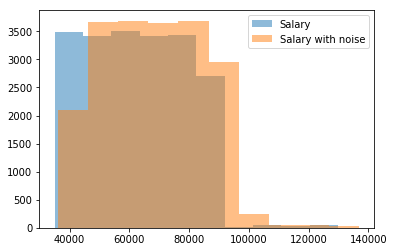

In [74]:
import random
import numpy
from matplotlib import pyplot

x = Employee_data.Salary
y = Anonymized_data_final.Salary


pyplot.hist(x,  alpha=0.5, label='Salary')
pyplot.hist(y,  alpha=0.5, label='Salary with noise')
pyplot.legend(loc='upper right')
pyplot.show()

On the plots of Salary and Salary with noise we see pretty much the same distribution. We compared Salaries before adding noise and after, using Paired T-Test, sinse they are not independent one from another.

In [86]:
# Perform the Paired T-Test
stats.ttest_rel(x, y)

Ttest_relResult(statistic=-301.1412817529016, pvalue=0.0)

Our t-statistic value is -301.14, and along with our degrees of freedom (20133) this can be used to calculate a p-value.
The p-value is 0.0, which is below than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference in Salaries before and after adding noise with 99% confidance. We saved categorical attributes "Job" and "Office_Location" in original shape.

In [ ]:
# save a local file
gendf.to_csv(r'C:\Users\shayden\Documents\SMU\Data and Network Security\MSDS-7349-Sec403-\Class_Project\Gen_Employee_data.csv')